<a href="https://colab.research.google.com/github/ayodelenaomii/Iris-Flower/blob/main/FAULT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




Importing data from drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_excel('/content/drive/MyDrive/TCN DATA (1).xlsx')
Data

,Highest Frequency,Lowest Frequency,Highest Voltage,Lowest Voltage,PEAK GENERATION,LOWEST GENERATION,INTERRUPTED POWER,EQUIPMENT HEALTH,WEATHER CONDITION,FAULTS,TRANSMISSION LINE
0,50.000,49.00,349.0,300.0,4531.50,3784.70,414,Nil,RAINFALL,YES,Omotosho/Ikeja-West 330kV line
1,50.847,49.01,349.0,300.0,4482.50,3955.47,Nil,Nil,RAINFALL,Nil,Nil
2,50.983,49.01,358.0,300.0,4579.60,3231.80,Nil,POWER TRANSFORMER,RAINFALL,Nil,Nil
3,50.960,49.01,353.0,300.0,4552.76,3890.10,483.7,CIRCUIT BREAKER,RAINFALL,YES,Osogbo/Ikeja-West 330kV line
4,50.820,49.01,355.0,300.0,4204.80,3929.00,373.8,Nil,RAINFALL,YES,Shiroro/Katampe 330kV line
...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,19798.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: Using dataframe Data: Scatter

import altair as alt
chart = alt.Chart(Data).mark_circle().encode(x='Highest Frequency ', y='Lowest Frequency').interactive()
chart


alt.Chart(...)

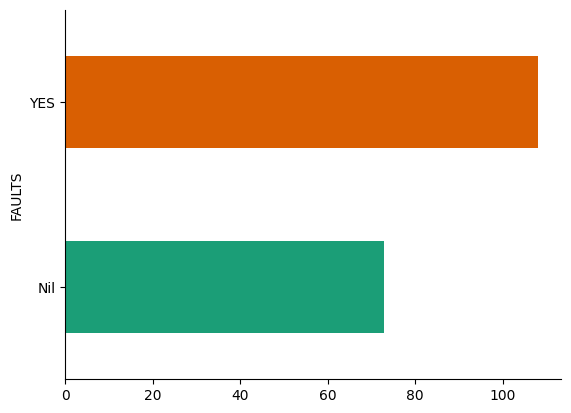

In [ ]:
# @title FAULTS

from matplotlib import pyplot as plt
import seaborn as sns
Data.groupby('FAULTS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


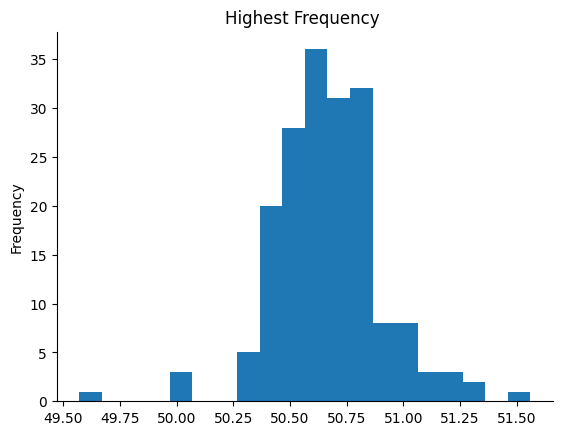

In [ ]:
# @title Highest Frequency

from matplotlib import pyplot as plt
Data['Highest Frequency '].plot(kind='hist', bins=20, title='Highest Frequency ')
plt.gca().spines[['top', 'right',]].set_visible(False)

Removing NaN

In [ ]:
data = Data.dropna()

EDA


In [ ]:

data.shape

(179, 11)

In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Highest Frequency   Lowest Frequency  Highest Voltage  Lowest Voltage  \
0                 False             False            False           False   
1                 False             False            False           False   
2                 False             False            False           False   
3                 False             False            False           False   
4                 False             False            False           False   
..                  ...               ...              ...             ...   
177               False             False            False           False   
178               False             False            False           False   
179               False             False            False           False   
180               False             False            False           False   
181               False             False            False           False   

     PEAK GENERATION  LOWEST GENERATION  INTERRUPTED POWER  EQUIPMENT HEALTH  \
0              False              False              False             False   
1              False              False              False             False   
2              False              False              False             False   
3              False              False              False             False   
4              False              False              False             False   
..               ...                ...                ...               ...   
177            False              False              False             False   
178            False              False              False             False   
179            False              False              False             False   
180            False              False              False             False   
181            False              False              False             False   

     WEATHER CONDITION  FAULTS  TRANSMISSION LINE  
0                False   False              False  
1                False   False              False  
2                False   False              False  
3                False   False              False  
4                False   False              False  
..                 ...     ...                ...  
177              False   False              False  
178              False   False              False  
179              False   False              False  
180              False   False              False  
181              False   False              False  

[179 rows x 11 columns]>

In [ ]:
data['INTERRUPTED POWER'].value_counts()

INTERRUPTED POWER
Nil      43
337       2
114       2
360.3     1
341       1
         ..
27.1      1
137.9     1
117       1
348.6     1
153       1
Name: count, Length: 135, dtype: int64

In [ ]:
data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('Nil', np.nan)

<ipython-input-88-b05a2b1fd7cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('Nil', np.nan)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 181
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Highest Frequency   179 non-null    float64
 1   Lowest Frequency    179 non-null    float64
 2   Highest Voltage     179 non-null    float64
 3   Lowest Voltage      179 non-null    float64
 4   PEAK GENERATION     179 non-null    float64
 5   LOWEST GENERATION   179 non-null    float64
 6   INTERRUPTED POWER   136 non-null    object 
 7   EQUIPMENT HEALTH    179 non-null    object 
 8   WEATHER CONDITION   179 non-null    object 
 9   FAULTS              179 non-null    object 
 10  TRANSMISSION LINE   179 non-null    object 
dtypes: float64(6), object(5)
memory usage: 16.8+ KB


In [ ]:
data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', np.nan).astype(float)
data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', 0.0).astype(float)
data['EQUIPMENT HEALTH'] = data['EQUIPMENT HEALTH'].astype(str)
data['WEATHER CONDITION'] = data['WEATHER CONDITION'].astype(str)
data['FAULTS'] = data['FAULTS'].astype(str)
data['TRANSMISSION LINE'] = data['TRANSMISSION LINE'].astype(str)

<ipython-input-90-24223408b6df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', np.nan).astype(float)
<ipython-input-90-24223408b6df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', 0.0).astype(float)
<ipython-input-90-24223408b6df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 181
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Highest Frequency   179 non-null    float64
 1   Lowest Frequency    179 non-null    float64
 2   Highest Voltage     179 non-null    float64
 3   Lowest Voltage      179 non-null    float64
 4   PEAK GENERATION     179 non-null    float64
 5   LOWEST GENERATION   179 non-null    float64
 6   INTERRUPTED POWER   135 non-null    float64
 7   EQUIPMENT HEALTH    179 non-null    object 
 8   WEATHER CONDITION   179 non-null    object 
 9   FAULTS              179 non-null    object 
 10  TRANSMISSION LINE   179 non-null    object 
dtypes: float64(7), object(4)
memory usage: 16.8+ KB


Normalization.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Separate numeric and string columns
numeric_columns = data.select_dtypes(include=['float64']).columns
string_columns = data.select_dtypes(include=['object']).columns

# Create a copy of the original data to avoid modifying the original
data_normalized = data.copy()

# Normalize numeric columns
scaler = MinMaxScaler()
data_normalized[numeric_columns] = scaler.fit_transform(data_normalized[numeric_columns])

# Encode string columns using custom LabelEncoder with specified mapping
label_encoder_mapping = {}

for col in string_columns:
    data_normalized[col] = data_normalized[col].str.lower()
    label_encoder = LabelEncoder()
    data_normalized[col] = label_encoder.fit_transform(data_normalized[col])
    # Map 'nil' to 0 and other labels to consecutive numbers starting from 1
    data_normalized[col] = data_normalized[col].where(data_normalized[col] == 0, other=data_normalized[col]  )
    label_encoder_mapping[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Verify the changes
print(data_normalized.head())
print(label_encoder_mapping)


   Highest Frequency   Lowest Frequency  Highest Voltage  Lowest Voltage  \
0            0.215292          0.713749         0.700000        0.440994   
1            0.641348          0.717506         0.700000        0.440994   
2            0.709759          0.717506         0.828571        0.440994   
3            0.698189          0.717506         0.757143        0.440994   
4            0.627767          0.717506         0.785714        0.440994   

   PEAK GENERATION  LOWEST GENERATION  INTERRUPTED POWER  EQUIPMENT HEALTH  \
0         0.575111           0.784992           0.239303                 9   
1         0.544167           0.820759                NaN                 9   
2         0.605487           0.669191                NaN                10   
3         0.588537           0.807067           0.279660                 2   
4         0.368799           0.815215           0.216027                 9   

   WEATHER CONDITION  FAULTS  TRANSMISSION LINE  
0                  1    



Feature Selection for Mutual information


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Assuming data_normalized is your DataFrame
# Remove samples with missing values from the target data
y = data_normalized['FAULTS'].dropna()

# Drop the target column from X temporarily to handle missing values
X = data_normalized.drop('FAULTS', axis=1)

# Use SimpleImputer to fill missing values with the mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Select 4 best features using Mutual Information
selector = SelectKBest(mutual_info_classif, k=4)
X_selected = selector.fit_transform(X_imputed, y)

# Get the names of selected features
selected_feature_names = X_imputed.columns[selector.get_support()].tolist()

# Get the scores for all features
feature_scores = selector.scores_

# Create a DataFrame to display feature names and their scores
feature_scores_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Score': feature_scores
})

# Sort the DataFrame by scores in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Print the scores for every feature
print("Feature Scores:")
print(feature_scores_df)

# Print the names of selected features
print("\nSelected Features:")
print(selected_feature_names)




Feature Scores:
              Feature     Score
9   TRANSMISSION LINE  0.558243
6   INTERRUPTED POWER  0.215536
7    EQUIPMENT HEALTH  0.043511
5   LOWEST GENERATION  0.029694
4     PEAK GENERATION  0.017020
0  Highest Frequency   0.000000
1    Lowest Frequency  0.000000
2     Highest Voltage  0.000000
3      Lowest Voltage  0.000000
8   WEATHER CONDITION  0.000000

Selected Features:
['LOWEST GENERATION', 'INTERRUPTED POWER', 'EQUIPMENT HEALTH', 'TRANSMISSION LINE']


Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split


# Split the data into training (70%) and temp (30%)
X_train, X_test , y_train, y_test = train_test_split(X_imputed[selected_feature_names], y, test_size=0.3, random_state=42)

# Further split the temp data into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Display the shape of the training, validation, and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (125, 4) (125,)
Validation set shape: (27, 4) (27,)
Testing set shape: (27, 4) (27,)


In [ ]:
X_train, X_test,X_val, y_train, y_test, y_val


(     LOWEST GENERATION  INTERRUPTED POWER  EQUIPMENT HEALTH  TRANSMISSION LINE
 124           0.898741           0.199931               9.0               11.0
 60            0.732548           0.170343               9.0               62.0
 26            0.800889           0.049389               2.0               19.0
 154           0.918116           0.147820              10.0               44.0
 96            0.775065           0.510393               9.0               53.0
 ..                 ...                ...               ...                ...
 71            0.785369           0.170207               9.0               44.0
 106           0.834023           0.114238               9.0               56.0
 14            0.790354           0.170207               9.0               23.0
 92            0.807403           0.170207               2.0               44.0
 102           0.778835           0.104974               6.0               23.0
 
 [125 rows x 4 columns],
      LOWEST 

Model Selection and Model Training

KNN MODEL

Accuracy of train: 0.91
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        48
           1       1.00      0.86      0.92        77

    accuracy                           0.91       125
   macro avg       0.91      0.93      0.91       125
weighted avg       0.93      0.91      0.91       125

[[48  0]
 [11 66]]
Accuracy of test: 0.89
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.82      0.90        17

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

[[10  0]
 [ 3 14]]
Accuracy of validation: 0.93
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.85      0.92        13

    accuracy                           0.93        27
   macro avg  

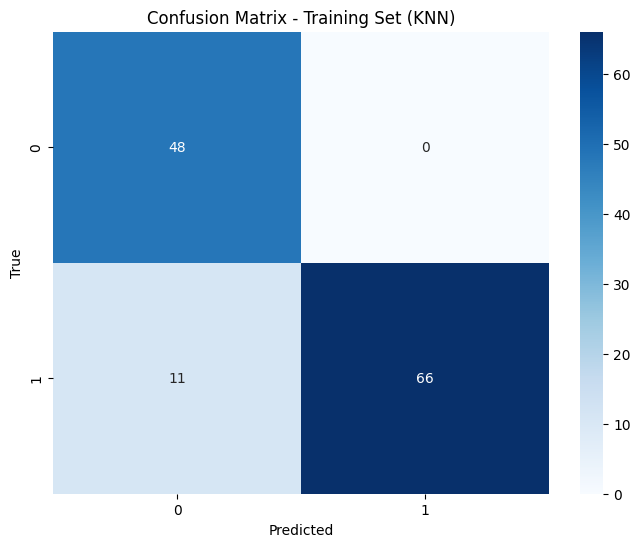

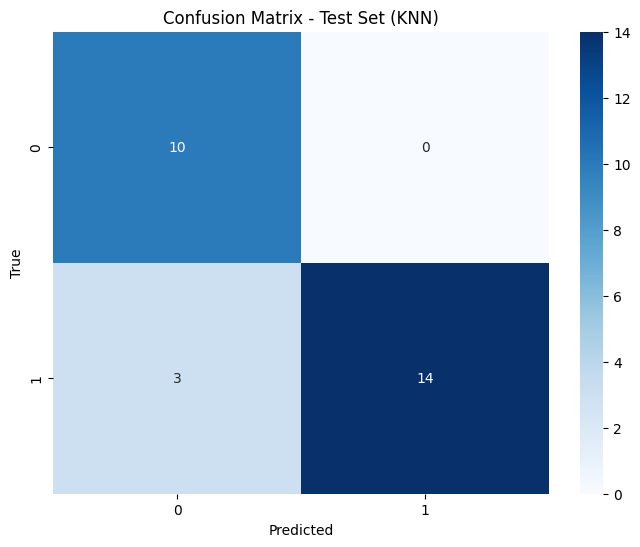

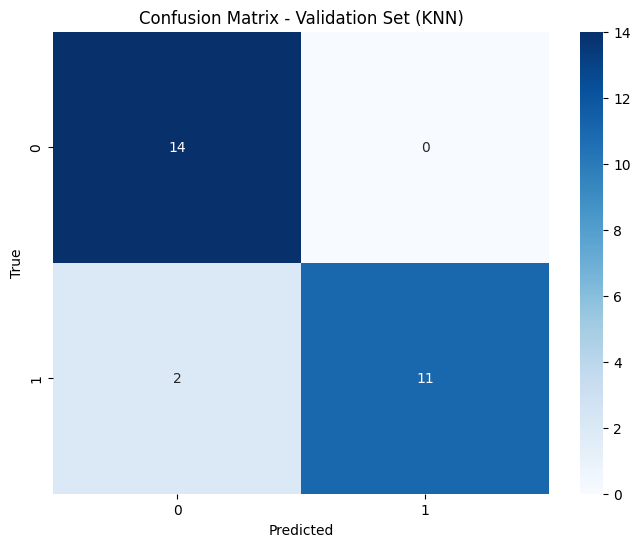

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


knn_classifier = KNeighborsClassifier(n_neighbors=13)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict the target variable for the training set
y_pred_train = knn_classifier.predict(X_train)
# Evaluate the accuracy of the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of train: {accuracy_train:.2f}")
print(classification_report(y_train, y_pred_train))

# Confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_train)

# Predict the target variable for the test set
y_pred_test = knn_classifier.predict(X_test)
# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of test: {accuracy_test:.2f}")
print(classification_report(y_test, y_pred_test))

# Confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

# Optionally evaluate on the validation set
y_pred_val = knn_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of validation: {accuracy_val:.2f}")
print(classification_report(y_val, y_pred_val))

# Confusion matrix for the validation set
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix_val)

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix_train, 'Confusion Matrix - Training Set (KNN)')
plot_confusion_matrix(confusion_matrix_test, 'Confusion Matrix - Test Set (KNN)')
plot_confusion_matrix(confusion_matrix_val, 'Confusion Matrix - Validation Set (KNN)')


KNN CONFUSION MATRIX

LDA MODEL

Accuracy of train: 0.70
              precision    recall  f1-score   support

           0       0.61      0.56      0.59        48
           1       0.74      0.78      0.76        77

    accuracy                           0.70       125
   macro avg       0.68      0.67      0.67       125
weighted avg       0.69      0.70      0.69       125

[[27 21]
 [17 60]]
Accuracy of test: 0.74
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.81      0.76      0.79        17

    accuracy                           0.74        27
   macro avg       0.72      0.73      0.73        27
weighted avg       0.75      0.74      0.74        27

[[ 7  3]
 [ 4 13]]
Accuracy of validation: 0.59
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.57      0.62      0.59        13

    accuracy                           0.59        27
   macro avg  

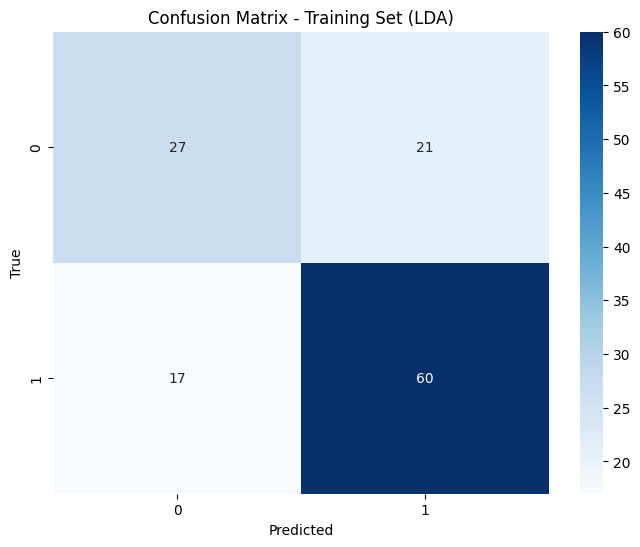

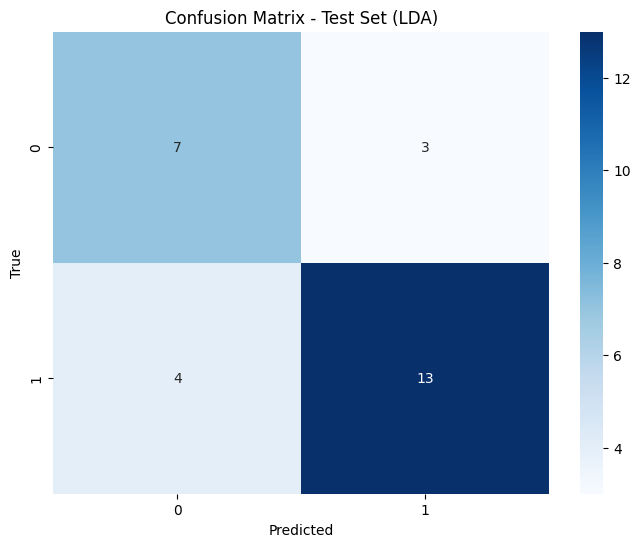

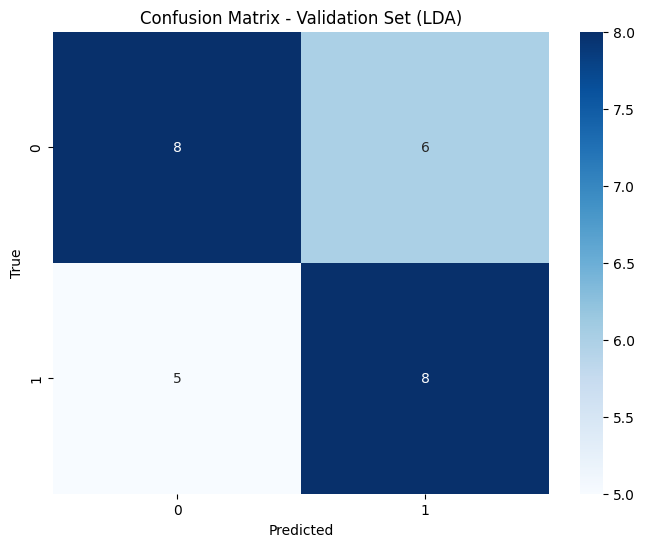

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


# Initialize the LDA classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier
lda_classifier.fit(X_train, y_train)

# Predict the target variable for the training set
y_pred_train = lda_classifier.predict(X_train)
# Evaluate the accuracy of the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of train: {accuracy_train:.2f}")
print(classification_report(y_train, y_pred_train))

# Confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_train)

# Predict the target variable for the test set
y_pred_test = lda_classifier.predict(X_test)
# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of test: {accuracy_test:.2f}")
print(classification_report(y_test, y_pred_test))

# Confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

# Optionally evaluate on the validation set
y_pred_val = lda_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of validation: {accuracy_val:.2f}")
print(classification_report(y_val, y_pred_val))

# Confusion matrix for the validation set
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix_val)

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix_train, 'Confusion Matrix - Training Set (LDA)')
plot_confusion_matrix(confusion_matrix_test, 'Confusion Matrix - Test Set (LDA)')
plot_confusion_matrix(confusion_matrix_val, 'Confusion Matrix - Validation Set (LDA)')


LDA CONFUSION MATRIX

QDA MODEL

Accuracy of train: 0.98
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.99      0.97      0.98        77

    accuracy                           0.98       125
   macro avg       0.97      0.98      0.97       125
weighted avg       0.98      0.98      0.98       125

[[47  1]
 [ 2 75]]
Accuracy of test: 0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        17

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0]
 [ 1 16]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

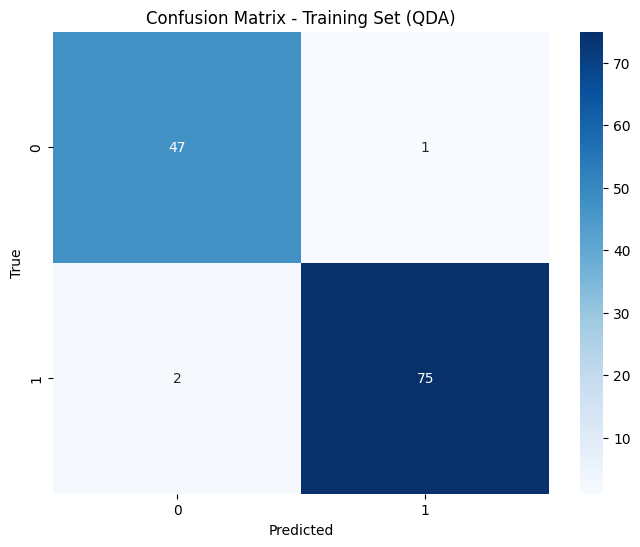

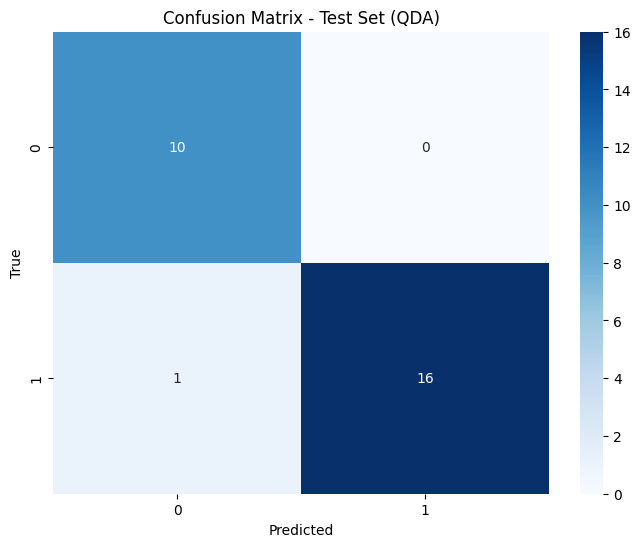

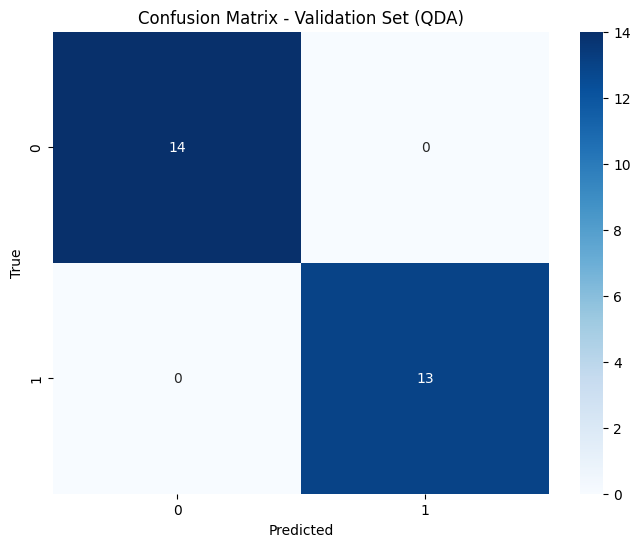

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


# Initialize the QDA classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Train the classifier
qda_classifier.fit(X_train, y_train)

# Predict the target variable for the training set
y_pred_train = qda_classifier.predict(X_train)
# Evaluate the accuracy of the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of train: {accuracy_train:.2f}")
print(classification_report(y_train, y_pred_train))

# Confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_train)

# Predict the target variable for the test set
y_pred_test = qda_classifier.predict(X_test)
# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of test: {accuracy_test:.2f}")
print(classification_report(y_test, y_pred_test))

# Confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

# Optionally evaluate on the validation set
y_pred_val = qda_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of validation: {accuracy_val:.2f}")
print(classification_report(y_val, y_pred_val))

# Confusion matrix for the validation set
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix_val)

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix_train, 'Confusion Matrix - Training Set (QDA)')
plot_confusion_matrix(confusion_matrix_test, 'Confusion Matrix - Test Set (QDA)')
plot_confusion_matrix(confusion_matrix_val, 'Confusion Matrix - Validation Set (QDA)')


ROC and AUC



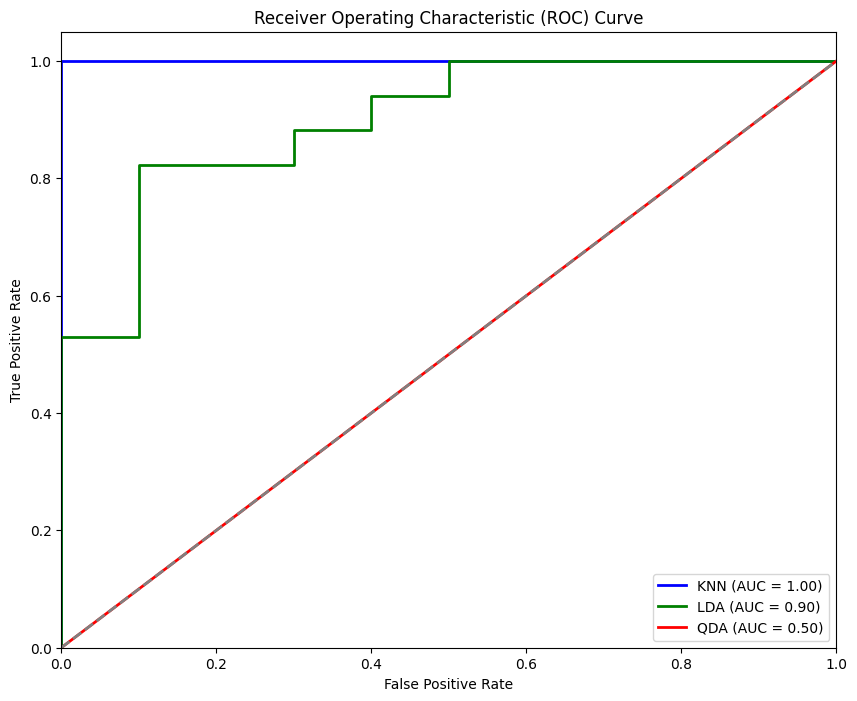

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class

# For KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# For LDA
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_proba_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# For QDA
# Handle NaN values in y_pred_proba_qda
# Replace NaN with a suitable value, e.g., 0
y_pred_proba_qda_fixed = np.nan_to_num(y_pred_proba_qda)

fpr_qda, tpr_qda, _ = roc_curve(y_test, y_pred_proba_qda_fixed)
roc_auc_qda = auc(fpr_qda, tpr_qda)

# ... (rest of your plotting code)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lda, tpr_lda, color='green', lw=2, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot(fpr_qda, tpr_qda, color='red', lw=2, label=f'QDA (AUC = {roc_auc_qda:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
